In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import yeojohnson, skew, boxcox, zscore

In [3]:
import pandas as pd

# Specify the file path and encoding
#file_path = r"C:\Users\jgjul\Downloads\Stat497\fantasy_basketball\Data\perg2023.csv"
#encoding = 'latin1'

# Read the CSV file with the specified encoding
#perg2023 = pd.read_csv(file_path, encoding=encoding)
#perg2023

In [4]:
file_path = r"C:\Users\jgjul\Downloads\Stat497\fantasy_basketball\Data\ALL_BBM_PlayerRankings.csv"
perg2023 = pd.read_csv(file_path)
perg2023

,Round,Rank,Value,Name,Team,Pos,Inj,g,m/g,p/g,...,3V,rV,aV,sV,bV,fg%V,ft%V,toV,ftm/g,fgm/g
0,1.0,1.0,0.846672,Nikola Jokic,DEN,C,NaN,69.0,33.667633,24.492754,...,-0.734344,2.491048,2.638997,0.839475,0.073692,2.831569,0.351737,-2.035619,4.942029,9.362319
1,1.0,2.0,0.830444,Joel Embiid,PHI,PF/C,NaN,66.0,34.608333,33.075758,...,-0.573557,1.789964,0.125549,0.096932,2.075253,1.505226,1.821690,-1.847004,10.015152,11.030303
2,1.0,3.0,0.754202,Shai Gilgeous-Alexander,OKC,PG/SG,NaN,68.0,35.529902,31.397059,...,-0.709516,-0.415431,0.703295,1.938729,0.615008,0.435191,3.116284,-1.118213,9.838235,10.352941
3,1.0,4.0,0.708996,Anthony Davis,LAL,PF/C,NaN,56.0,34.008631,25.910714,...,-1.184402,2.779579,-0.542684,0.249419,2.742718,1.646490,-0.355388,-0.335744,6.214286,9.678571
4,1.0,5.0,0.683828,Kevin Durant,PHO,SF/PF,NaN,47.0,35.568440,29.063830,...,0.331293,0.340557,0.501370,-0.690374,1.540410,1.680087,2.306014,-1.719503,6.531915,10.276596
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,25.0,298.0,-0.621976,Ish Wainright,PHO,PF,Questionable - calf,60.0,15.250833,4.183333,...,-0.619783,-1.462064,-1.322033,-0.946753,-0.545987,-0.663850,0.051747,1.862477,0.433333,1.400000
298,25.0,299.0,-0.623331,Yuta Watanabe,BKN,SF/PF,NaN,58.0,15.996839,5.551724,...,-0.541677,-1.414593,-1.346725,-1.522579,-0.690937,-0.026707,-0.172238,1.847138,0.586207,1.965517
299,25.0,300.0,-0.623633,Willy Hernangomez,NOR,C,NaN,37.0,12.369369,7.081081,...,-1.423118,-0.404377,-1.318242,-1.441670,-0.576165,0.195024,-0.165598,1.028532,2.189189,2.405405
300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#Dropping players who were traded in-season
#perg2023 = perg2023.drop_duplicates(subset=['Rk'])
#perg2023

In [6]:
perg2023 = perg2023[perg2023['g']>=15]
perg2023

,Round,Rank,Value,Name,Team,Pos,Inj,g,m/g,p/g,...,3V,rV,aV,sV,bV,fg%V,ft%V,toV,ftm/g,fgm/g
0,1.0,1.0,0.846672,Nikola Jokic,DEN,C,NaN,69.0,33.667633,24.492754,...,-0.734344,2.491048,2.638997,0.839475,0.073692,2.831569,0.351737,-2.035619,4.942029,9.362319
1,1.0,2.0,0.830444,Joel Embiid,PHI,PF/C,NaN,66.0,34.608333,33.075758,...,-0.573557,1.789964,0.125549,0.096932,2.075253,1.505226,1.821690,-1.847004,10.015152,11.030303
2,1.0,3.0,0.754202,Shai Gilgeous-Alexander,OKC,PG/SG,NaN,68.0,35.529902,31.397059,...,-0.709516,-0.415431,0.703295,1.938729,0.615008,0.435191,3.116284,-1.118213,9.838235,10.352941
3,1.0,4.0,0.708996,Anthony Davis,LAL,PF/C,NaN,56.0,34.008631,25.910714,...,-1.184402,2.779579,-0.542684,0.249419,2.742718,1.646490,-0.355388,-0.335744,6.214286,9.678571
4,1.0,5.0,0.683828,Kevin Durant,PHO,SF/PF,NaN,47.0,35.568440,29.063830,...,0.331293,0.340557,0.501370,-0.690374,1.540410,1.680087,2.306014,-1.719503,6.531915,10.276596
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,25.0,296.0,-0.618915,Terence Davis,SAC,SG/SF,NaN,64.0,13.139583,6.734375,...,-0.212416,-1.522163,-1.249595,-0.837047,-0.899019,-0.572455,-0.019910,1.302631,0.531250,2.406250
296,25.0,297.0,-0.619116,Jamal Cain,MIA,SF,NaN,18.0,13.335185,5.444444,...,-1.138543,-1.224550,-1.418001,-1.010006,-1.159003,0.327191,-0.093935,1.902918,0.944444,2.055556
297,25.0,298.0,-0.621976,Ish Wainright,PHO,PF,Questionable - calf,60.0,15.250833,4.183333,...,-0.619783,-1.462064,-1.322033,-0.946753,-0.545987,-0.663850,0.051747,1.862477,0.433333,1.400000
298,25.0,299.0,-0.623331,Yuta Watanabe,BKN,SF/PF,NaN,58.0,15.996839,5.551724,...,-0.541677,-1.414593,-1.346725,-1.522579,-0.690937,-0.026707,-0.172238,1.847138,0.586207,1.965517


In [7]:
test = plt.scatter(x=perg2023['MP'], y=perg2023['BLK'])
test

KeyError: 'MP'

In [ ]:
#Defining a function

def count_values_in_interval(df, column_name, start, end):
    condition = (df[column_name] >= start) & (df[column_name] <= end)
    count = condition.sum()
    return count

# Define the range and interval
start = 0
end = 3.1
interval = 0.1

# Initialize lists to store interval boundaries and counts
interval_start = []
interval_end = []
counts = []

# Iterate through the intervals and count occurrences
for i in range(int(start / interval), int(end / interval)):
    start_value = i * interval
    end_value = (i + 1) * interval
    count = count_values_in_interval(perg2023, 'b/g', start_value, end_value)
    interval_start.append(start_value)
    interval_end.append(end_value)
    counts.append(count)

# Create a bar chart with floating-point numbers on the x-axis
plt.bar([f'{a:.1f}-{b:.1f}' for a, b in zip(interval_start, interval_end)], counts)
plt.xlabel('Interval')
plt.ylabel('Occurrences')
plt.title('Occurrences in Intervals')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

In [10]:
#Isolating the blocks column for testing purposes

blk = perg2023.loc[:,'b/g':'b/g']
blk

,b/g
0,0.681159
1,1.696970
2,0.955882
3,2.035714
4,1.425532
...,...
295,0.187500
296,0.055556
297,0.366667
298,0.293103


b/g
2.3368323032832614


<Figure size 640x480 with 0 Axes>

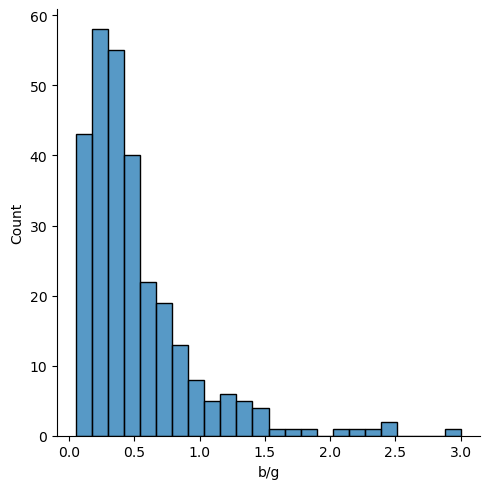

In [12]:
#Better way to create a histogram

for col in blk:
    print(col)
    print(skew(blk[col]))
    
    plt.figure()
    sns.displot(blk[col])
    plt.show()

<Axes: ylabel='Density'>

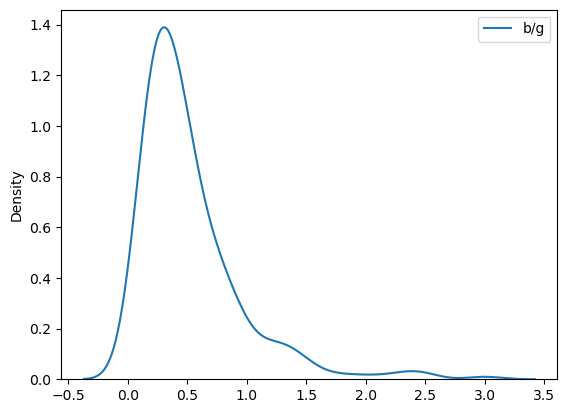

In [14]:
#Density function of our blocks

sns.kdeplot(blk)

b/g    1.117662
dtype: float64

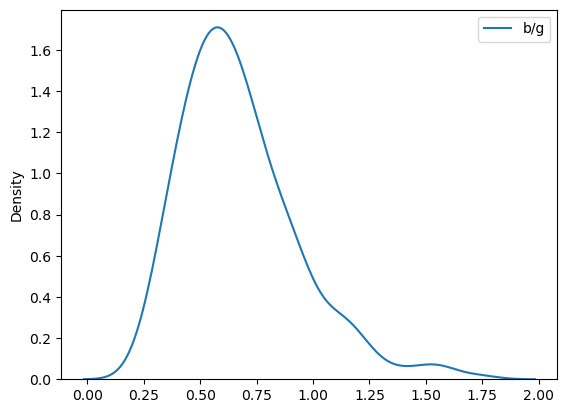

In [16]:
#Transoforming the data via squre root function

sns.kdeplot(np.sqrt(blk))

#Checking the skew

np.sqrt(blk).skew()

In [18]:
#Cube root yields a more or less normally distribted set of data
((blk)**(1/3)).skew()

b/g    0.744849
dtype: float64

<Axes: ylabel='Density'>

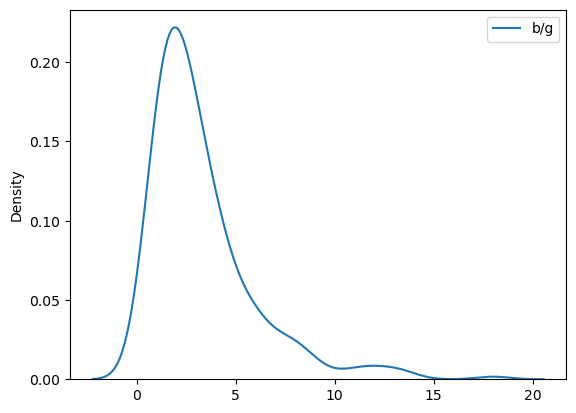

In [20]:
sns.kdeplot(1/blk)

In [22]:
yeojohnson(blk)
#sns.kdeplot(yeojohnson(blk, -1.94502115))

(array([[0.31896849],
        [0.42259197],
        [0.36357203],
        [0.43619743],
        [0.40723018],
        [0.22666893],
        [0.20726832],
        [0.25850262],
        [0.33218054],
        [0.21488599],
        [0.32059491],
        [0.45756654],
        [0.28558676],
        [0.41423319],
        [0.2416705 ],
        [0.27488514],
        [0.28451762],
        [0.28882935],
        [0.29521053],
        [0.44287738],
        [0.27304284],
        [0.44816255],
        [0.29670918],
        [0.44843734],
        [0.22666893],
        [0.32178148],
        [0.331505  ],
        [0.27092242],
        [0.21964819],
        [0.20516195],
        [0.23274343],
        [0.32942666],
        [0.39289024],
        [0.18227958],
        [0.34300617],
        [0.23516401],
        [0.23283934],
        [0.29778349],
        [0.32928527],
        [0.39116783],
        [0.20932288],
        [0.27690726],
        [0.28714139],
        [0.16348209],
        [0.23840329],
        [0

In [24]:
skew(yeojohnson(blk, -1.82224092))

array([0.23752994])

In [26]:
pts = perg2023.loc[:,'p/g':'p/g']
pts

,p/g
0,24.492754
1,33.075758
2,31.397059
3,25.910714
4,29.063830
...,...
295,6.734375
296,5.444444
297,4.183333
298,5.551724


p/g
0.9270415596256385


<Figure size 640x480 with 0 Axes>

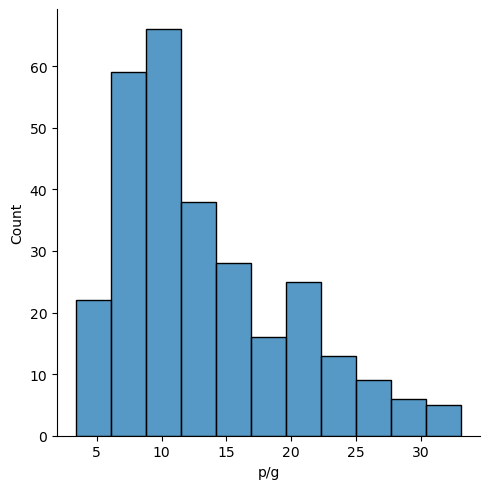

In [28]:
for col in pts:
    print(col)
    print(skew(pts[col]))
    
    plt.figure()
    sns.displot(pts[col])
    plt.show()

<Axes: ylabel='Density'>

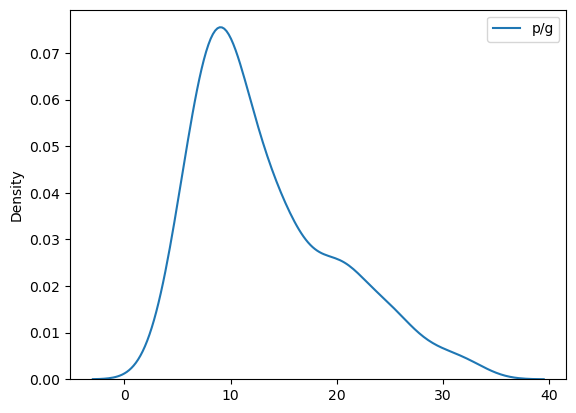

In [30]:
sns.kdeplot(pts)

In [32]:
#Getting the lambda
yeojohnson(pts)

(array([[2.53044949],
        [2.69981907],
        [2.67089365],
        [2.56263882],
        [2.62766806],
        [2.63467685],
        [2.68446445],
        [2.43340588],
        [2.58710915],
        [2.491878  ],
        [2.64672402],
        [2.37073323],
        [2.51461013],
        [2.49808984],
        [2.61196158],
        [2.68827431],
        [2.44044732],
        [2.39337751],
        [2.55622899],
        [2.34912262],
        [2.38621364],
        [2.27614908],
        [2.62466479],
        [2.13795646],
        [2.51361368],
        [2.33894232],
        [2.30882705],
        [2.5315678 ],
        [2.60167576],
        [2.50117145],
        [2.1947958 ],
        [2.41673155],
        [2.2106866 ],
        [2.42655295],
        [2.42408028],
        [2.45512193],
        [2.39050714],
        [2.43465533],
        [2.5337226 ],
        [2.10511326],
        [2.54251144],
        [2.52414658],
        [2.22253011],
        [2.51912667],
        [2.57815755],
        [2

<Axes: ylabel='Density'>

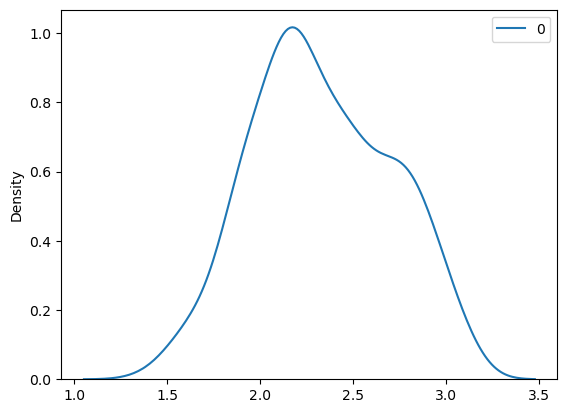

In [34]:
#Using the lambda to plot the transformed data
sns.kdeplot(yeojohnson(pts, -0.07144519))

In [36]:
#Checking the skew

skew(yeojohnson(pts, -0.18990405))

array([-0.00939814])

array([0.3215049])

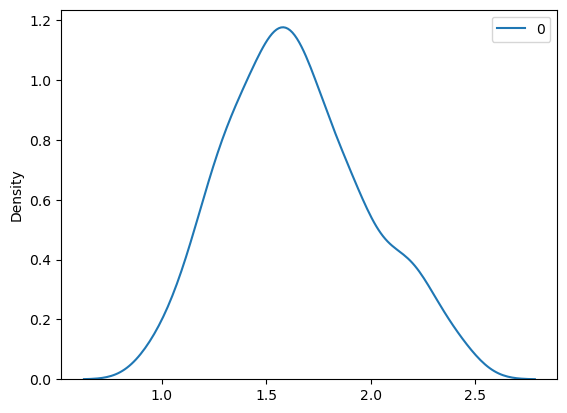

In [38]:
trb = perg2023.loc[:,'r/g':'r/g']
#yeojohnson(trb)
sns.kdeplot(yeojohnson(trb, -0.04327464))
skew(yeojohnson(trb, -0.04327464))

array([0.09202706])

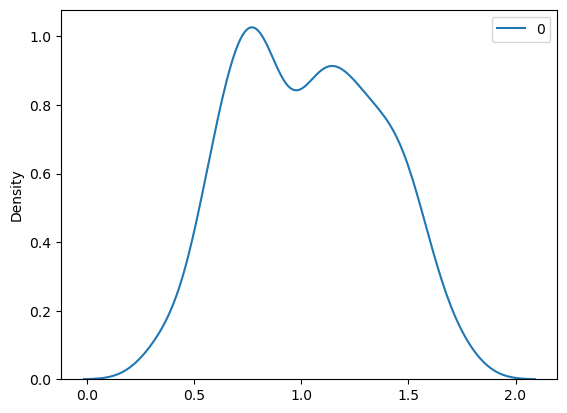

In [40]:
ast = perg2023.loc[:,'a/g':'a/g']
#sns.kdeplot(ast)
#yeojohnson(ast)
sns.kdeplot(yeojohnson(ast, -0.28509004))
skew(yeojohnson(ast,-0.28509004))

array([-0.02098503])

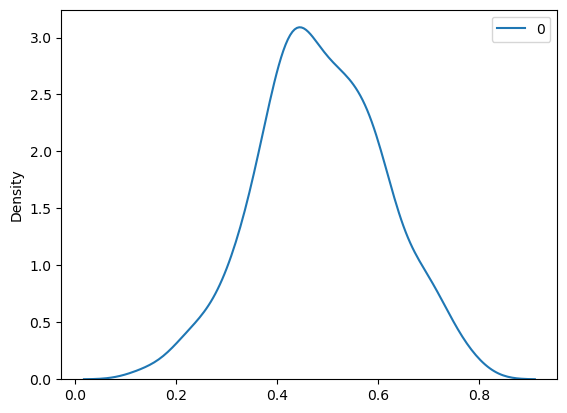

In [42]:
stl = perg2023.loc[:,'s/g':'s/g']
#sns.kdeplot(stl)
#yeojohnson(stl)
sns.kdeplot(yeojohnson(stl, -0.59746918))
skew(yeojohnson(stl, -0.59746918))

array([0.20270139])

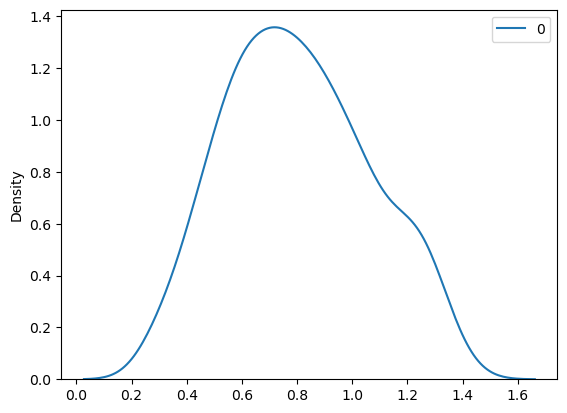

In [43]:
tov = perg2023.loc[:,'to/g':'to/g']
#sns.kdeplot(tov)
#yeojohnson(tov)
sns.kdeplot(yeojohnson(tov, -0.18391158))
skew(yeojohnson(tov, -0.18391158))

In [45]:
threes = perg2023.loc[:,'3/g':'3/g']
#sns.kdeplot(threes)
#yeojohnson(threes)
#sns.kdeplot(yeojohnson(threes, 0.36130173))
#skew(yeojohnson(threes, 0.36130173))
yeojohnson(threes, 0.36130173)

array([[0.67270292],
       [0.78766421],
       [0.69089788],
       [0.30811089],
       [1.33803112],
       [2.47998865],
       [2.25601673],
       [1.7473944 ],
       [1.85391555],
       [0.48428216],
       [1.89794632],
       [1.13427561],
       [1.34860299],
       [1.40139123],
       [2.03714631],
       [1.71691432],
       [1.70531247],
       [1.79948541],
       [1.81195648],
       [1.08618288],
       [0.35164209],
       [1.21784606],
       [1.44571591],
       [0.        ],
       [1.72474103],
       [1.07255555],
       [1.40706068],
       [0.52821418],
       [1.39491017],
       [2.18295784],
       [1.17408309],
       [1.3664532 ],
       [0.01463737],
       [1.24586083],
       [0.01327697],
       [1.74194475],
       [1.51982358],
       [1.38254481],
       [1.67098446],
       [0.        ],
       [1.15749424],
       [0.97759422],
       [1.60982785],
       [1.33397618],
       [1.55400697],
       [1.56147329],
       [2.0360368 ],
       [1.650

In [48]:
#I observe that the transformed distributions work quite well for blocks, steals and turnovers while working somewhat well for points and slgithyl worse for assists. 
#I considered applying a cube root transformation to the assist category but so far have decided against it for the sake of consistency

In [50]:
#First create a new ranking system and assess its performance and then secondly try to create a predictive model

In [52]:
zblk = zscore(blk)
ztrb = zscore(trb)
zstl = zscore(stl)
zast = zscore(ast)
ztov = zscore(tov)
zpts = zscore(pts)
zthrees = zscore(threes)

In [54]:
#Finding the total Zscore for each player
zscores = ztrb.add(zstl['s/g'],axis= 0).add(zast['a/g'],axis= 0).add(ztov['to/g'],axis= 0).add(zblk['b/g'],axis= 0).add(zpts['p/g'],axis= 0).add(zthrees['3/g'],axis=0)

In [56]:
zscores = zscores.rename(columns={'r/g': 'Zscore'})
zscores

,Zscore
0,11.653591
1,10.994567
2,8.404323
3,8.924930
4,8.742481
...,...
295,-5.191474
296,-7.427273
297,-6.338531
298,-6.778863


In [58]:
#Concat the zscore column to original dataframe
newperg2023 = pd.concat([perg2023, zscores['Zscore']], axis=1)
newperg2023

,Round,Rank,Value,Name,Team,Pos,Inj,g,m/g,p/g,...,rV,aV,sV,bV,fg%V,ft%V,toV,ftm/g,fgm/g,Zscore
0,1.0,1.0,0.846672,Nikola Jokic,DEN,C,NaN,69.0,33.667633,24.492754,...,2.491048,2.638997,0.839475,0.073692,2.831569,0.351737,-2.035619,4.942029,9.362319,11.653591
1,1.0,2.0,0.830444,Joel Embiid,PHI,PF/C,NaN,66.0,34.608333,33.075758,...,1.789964,0.125549,0.096932,2.075253,1.505226,1.821690,-1.847004,10.015152,11.030303,10.994567
2,1.0,3.0,0.754202,Shai Gilgeous-Alexander,OKC,PG/SG,NaN,68.0,35.529902,31.397059,...,-0.415431,0.703295,1.938729,0.615008,0.435191,3.116284,-1.118213,9.838235,10.352941,8.404323
3,1.0,4.0,0.708996,Anthony Davis,LAL,PF/C,NaN,56.0,34.008631,25.910714,...,2.779579,-0.542684,0.249419,2.742718,1.646490,-0.355388,-0.335744,6.214286,9.678571,8.924930
4,1.0,5.0,0.683828,Kevin Durant,PHO,SF/PF,NaN,47.0,35.568440,29.063830,...,0.340557,0.501370,-0.690374,1.540410,1.680087,2.306014,-1.719503,6.531915,10.276596,8.742481
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,25.0,296.0,-0.618915,Terence Davis,SAC,SG/SF,NaN,64.0,13.139583,6.734375,...,-1.522163,-1.249595,-0.837047,-0.899019,-0.572455,-0.019910,1.302631,0.531250,2.406250,-5.191474
296,25.0,297.0,-0.619116,Jamal Cain,MIA,SF,NaN,18.0,13.335185,5.444444,...,-1.224550,-1.418001,-1.010006,-1.159003,0.327191,-0.093935,1.902918,0.944444,2.055556,-7.427273
297,25.0,298.0,-0.621976,Ish Wainright,PHO,PF,Questionable - calf,60.0,15.250833,4.183333,...,-1.462064,-1.322033,-0.946753,-0.545987,-0.663850,0.051747,1.862477,0.433333,1.400000,-6.338531
298,25.0,299.0,-0.623331,Yuta Watanabe,BKN,SF/PF,NaN,58.0,15.996839,5.551724,...,-1.414593,-1.346725,-1.522579,-0.690937,-0.026707,-0.172238,1.847138,0.586207,1.965517,-6.778863


In [60]:
newperg2023 = newperg2023.sort_values(by='Zscore', ascending=False)
newperg2023

,Round,Rank,Value,Name,Team,Pos,Inj,g,m/g,p/g,...,rV,aV,sV,bV,fg%V,ft%V,toV,ftm/g,fgm/g,Zscore
15,2.0,16.0,0.407634,Luka Doncic,DAL,PG/SG,Questionable - calf strain,66.0,36.219949,32.393939,...,1.154778,1.836876,1.131992,-0.283266,0.057447,-1.667047,-2.030824,7.803030,10.893939,12.583510
0,1.0,1.0,0.846672,Nikola Jokic,DEN,C,NaN,69.0,33.667633,24.492754,...,2.491048,2.638997,0.839475,0.073692,2.831569,0.351737,-2.035619,4.942029,9.362319,11.653591
29,3.0,30.0,0.180251,LaMelo Ball,CHA,PG/SG,NaN,36.0,35.216204,23.277778,...,0.239732,2.027024,0.887603,-0.666401,-2.332790,0.329960,-2.040015,2.833333,8.222222,11.042309
1,1.0,2.0,0.830444,Joel Embiid,PHI,PF/C,NaN,66.0,34.608333,33.075758,...,1.789964,0.125549,0.096932,2.075253,1.505226,1.821690,-1.847004,10.015152,11.030303,10.994567
16,2.0,17.0,0.400140,James Harden,PHI,PG/SG,Questionable - not w/ sixers,58.0,36.810345,20.965517,...,0.109724,3.006226,0.734921,-0.215321,-1.087672,1.134204,-1.771574,5.396552,6.396552,10.399772
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,24.0,280.0,-0.586040,T.J. Warren,PHO,SF/PF,NaN,42.0,16.350794,7.476190,...,-1.227844,-1.291449,-1.258503,-0.705496,-0.057483,-0.002896,1.729602,0.666667,3.142857,-6.400153
293,25.0,294.0,-0.613305,Mike Muscala,BOS,C,NaN,63.0,14.998942,6.079365,...,-1.086193,-1.361756,-2.071764,-0.517839,-0.304273,-0.072187,1.864403,0.634921,2.079365,-6.494391
298,25.0,299.0,-0.623331,Yuta Watanabe,BKN,SF/PF,NaN,58.0,15.996839,5.551724,...,-1.414593,-1.346725,-1.522579,-0.690937,-0.026707,-0.172238,1.847138,0.586207,1.965517,-6.778863
278,24.0,279.0,-0.585408,Jericho Sims,NYK,C,NaN,52.0,15.622756,3.423077,...,-0.491965,-1.500341,-1.928400,-0.207481,0.793101,-0.044745,1.677385,0.230769,1.596154,-7.108962


In [61]:
#Filter out players who played small sample size of games
#Put each category's Zscore in order to be able to account for punt builds

In [62]:
#newperg2023.to_csv('newrankings.csv', index=False)

In [63]:
##Dealing with free throw percentage

In [64]:
#Average ft%: ~78.89294907771685%
#Average fta in a 12 team league: ~2.7623668192299653
#Average ftm in a 12 team league: ~2.164230899605536
#Number of players per team = 17 (varaible)

#Find a way based on your teams given current fta and ft% to determine which player will most benifit your team at a given point in your draft or at a given point in the season

#Use All_BBM_PLayerRankings instead of file currently being used

In [68]:
perg2023

,Round,Rank,Value,Name,Team,Pos,Inj,g,m/g,p/g,...,3V,rV,aV,sV,bV,fg%V,ft%V,toV,ftm/g,fgm/g
0,1.0,1.0,0.846672,Nikola Jokic,DEN,C,NaN,69.0,33.667633,24.492754,...,-0.734344,2.491048,2.638997,0.839475,0.073692,2.831569,0.351737,-2.035619,4.942029,9.362319
1,1.0,2.0,0.830444,Joel Embiid,PHI,PF/C,NaN,66.0,34.608333,33.075758,...,-0.573557,1.789964,0.125549,0.096932,2.075253,1.505226,1.821690,-1.847004,10.015152,11.030303
2,1.0,3.0,0.754202,Shai Gilgeous-Alexander,OKC,PG/SG,NaN,68.0,35.529902,31.397059,...,-0.709516,-0.415431,0.703295,1.938729,0.615008,0.435191,3.116284,-1.118213,9.838235,10.352941
3,1.0,4.0,0.708996,Anthony Davis,LAL,PF/C,NaN,56.0,34.008631,25.910714,...,-1.184402,2.779579,-0.542684,0.249419,2.742718,1.646490,-0.355388,-0.335744,6.214286,9.678571
4,1.0,5.0,0.683828,Kevin Durant,PHO,SF/PF,NaN,47.0,35.568440,29.063830,...,0.331293,0.340557,0.501370,-0.690374,1.540410,1.680087,2.306014,-1.719503,6.531915,10.276596
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,25.0,296.0,-0.618915,Terence Davis,SAC,SG/SF,NaN,64.0,13.139583,6.734375,...,-0.212416,-1.522163,-1.249595,-0.837047,-0.899019,-0.572455,-0.019910,1.302631,0.531250,2.406250
296,25.0,297.0,-0.619116,Jamal Cain,MIA,SF,NaN,18.0,13.335185,5.444444,...,-1.138543,-1.224550,-1.418001,-1.010006,-1.159003,0.327191,-0.093935,1.902918,0.944444,2.055556
297,25.0,298.0,-0.621976,Ish Wainright,PHO,PF,Questionable - calf,60.0,15.250833,4.183333,...,-0.619783,-1.462064,-1.322033,-0.946753,-0.545987,-0.663850,0.051747,1.862477,0.433333,1.400000
298,25.0,299.0,-0.623331,Yuta Watanabe,BKN,SF/PF,NaN,58.0,15.996839,5.551724,...,-0.541677,-1.414593,-1.346725,-1.522579,-0.690937,-0.026707,-0.172238,1.847138,0.586207,1.965517


In [72]:
#n = # of players on fantasy team
#fta1 = average # fta's of top 300 players
#ftp1 = average ft% of top 300 players
#fta2 = # of fta's of player in quesion
#ftp2 = average ft% of player in question 

#n*fta1*ftp1+fta2*ftp2

def z_ft(n, fta1, ftp1, fta2, ftp2):
    numerator = n * fta1 * ftp1 + fta2 * ftp2
    denominator = n * fta1 + fta2
    
    result = numerator / denominator
    return result


#Example for Luka Doncic
z_ft(16,2.7623668192299653,0.7889294907771685,10.51515152,0.742074927953891)

0.7799246355920962

In [74]:
fts = z_ft(16,2.7623668192299653,0.7889294907771685,perg2023['fta/g'],perg2023['ft%'])

In [76]:
ftV = pd.DataFrame(fts, columns=['ftV'])
ftV

,ftV
0,0.792853
1,0.803228
2,0.811892
3,0.788147
4,0.806969
...,...
295,0.788956
296,0.788494
297,0.789505
298,0.787750


In [78]:
newperg2023 = pd.concat([perg2023, ftV['ftV']], axis=1)
newperg2023

,Round,Rank,Value,Name,Team,Pos,Inj,g,m/g,p/g,...,rV,aV,sV,bV,fg%V,ft%V,toV,ftm/g,fgm/g,ftV
0,1.0,1.0,0.846672,Nikola Jokic,DEN,C,NaN,69.0,33.667633,24.492754,...,2.491048,2.638997,0.839475,0.073692,2.831569,0.351737,-2.035619,4.942029,9.362319,0.792853
1,1.0,2.0,0.830444,Joel Embiid,PHI,PF/C,NaN,66.0,34.608333,33.075758,...,1.789964,0.125549,0.096932,2.075253,1.505226,1.821690,-1.847004,10.015152,11.030303,0.803228
2,1.0,3.0,0.754202,Shai Gilgeous-Alexander,OKC,PG/SG,NaN,68.0,35.529902,31.397059,...,-0.415431,0.703295,1.938729,0.615008,0.435191,3.116284,-1.118213,9.838235,10.352941,0.811892
3,1.0,4.0,0.708996,Anthony Davis,LAL,PF/C,NaN,56.0,34.008631,25.910714,...,2.779579,-0.542684,0.249419,2.742718,1.646490,-0.355388,-0.335744,6.214286,9.678571,0.788147
4,1.0,5.0,0.683828,Kevin Durant,PHO,SF/PF,NaN,47.0,35.568440,29.063830,...,0.340557,0.501370,-0.690374,1.540410,1.680087,2.306014,-1.719503,6.531915,10.276596,0.806969
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,25.0,296.0,-0.618915,Terence Davis,SAC,SG/SF,NaN,64.0,13.139583,6.734375,...,-1.522163,-1.249595,-0.837047,-0.899019,-0.572455,-0.019910,1.302631,0.531250,2.406250,0.788956
296,25.0,297.0,-0.619116,Jamal Cain,MIA,SF,NaN,18.0,13.335185,5.444444,...,-1.224550,-1.418001,-1.010006,-1.159003,0.327191,-0.093935,1.902918,0.944444,2.055556,0.788494
297,25.0,298.0,-0.621976,Ish Wainright,PHO,PF,Questionable - calf,60.0,15.250833,4.183333,...,-1.462064,-1.322033,-0.946753,-0.545987,-0.663850,0.051747,1.862477,0.433333,1.400000,0.789505
298,25.0,299.0,-0.623331,Yuta Watanabe,BKN,SF/PF,NaN,58.0,15.996839,5.551724,...,-1.414593,-1.346725,-1.522579,-0.690937,-0.026707,-0.172238,1.847138,0.586207,1.965517,0.787750


In [80]:
ftV.skew()
#Not particularly highly skewed, so it is not worth transforming as of right now

ftV   -0.476478
dtype: float64

In [82]:
zftV = zscore(ftV)
zftV

,ftV
0,0.671181
1,2.421489
2,3.882991
3,-0.122786
4,3.052445
...,...
295,0.013718
296,-0.064300
297,0.106288
298,-0.189771


In [84]:
##Dealing with field goal percentage

In [86]:
#average fg% ~0.48110449916500386
#average fga ~10.078599668933798

In [88]:
perg2023['fgm/g'].sum()/perg2023['fga/g'].sum()
perg2023['fga/g'].mean()

10.078599668933798

In [90]:
#n = # of players on fantasy team
#fga1 = average # fta's of top 300 players
#fgp1 = average ft% of top 300 players
#fga2 = # of fta's of player in quesion
#fgp2 = average ft% of player in question 

#n*fga1*fgp1+fga2*fgp2

def z_fg(n, fga1, fgp1, fga2, fgp2):
    numerator = n * fga1 * fgp1 + fga2 * fgp2
    denominator = n * fga1 + fga2
    
    result = numerator / denominator
    return result

In [92]:
fgs = z_fg(16,10.078599668933798,0.48110449916500386,perg2023['fga/g'],perg2023['fg%'])
fgV = pd.DataFrame(fgs, columns=['fgV'])
fgV.skew()

fgs

0      0.493806
1      0.488547
2      0.484311
3      0.489028
4      0.489194
         ...   
295    0.479128
296    0.482872
297    0.478559
298    0.481353
299    0.482358
Length: 287, dtype: float64

,fgV
0,3.612189
1,2.115139
2,0.909537
3,2.252146
4,2.299447
...,...
295,-0.566014
296,0.499809
297,-0.727982
298,0.067487


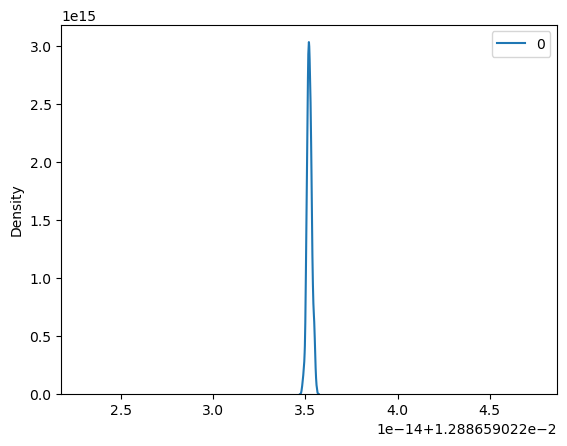

In [94]:
#sns.kdeplot(fgV)
#yeojohnson(fgV)
sns.kdeplot(yeojohnson(fgV, -77.60004647))
skew(yeojohnson(fgV, -77.60004647))
zfgV = zscore(fgV)
zfgV

In [96]:
zscores = ztrb.add(zstl['s/g'],axis= 0).add(zftV['ftV'],axis= 0).add(zfgV['fgV'],axis= 0).add(zast['a/g'],axis= 0).add(ztov['to/g'],axis= 0).add(zblk['b/g'],axis= 0).add(zpts['p/g'],axis= 0).add(zthrees['3/g'],axis=0)
zscores = zscores.rename(columns={'r/g': 'Zscore'})
newperg2023 = pd.concat([perg2023, zscores['Zscore']], axis=1)
newperg2023
newperg2023 = newperg2023.sort_values(by='Zscore', ascending=False)
newperg2023

,Round,Rank,Value,Name,Team,Pos,Inj,g,m/g,p/g,...,rV,aV,sV,bV,fg%V,ft%V,toV,ftm/g,fgm/g,Zscore
0,1.0,1.0,0.846672,Nikola Jokic,DEN,C,NaN,69.0,33.667633,24.492754,...,2.491048,2.638997,0.839475,0.073692,2.831569,0.351737,-2.035619,4.942029,9.362319,15.936961
1,1.0,2.0,0.830444,Joel Embiid,PHI,PF/C,NaN,66.0,34.608333,33.075758,...,1.789964,0.125549,0.096932,2.075253,1.505226,1.821690,-1.847004,10.015152,11.030303,15.531195
4,1.0,5.0,0.683828,Kevin Durant,PHO,SF/PF,NaN,47.0,35.568440,29.063830,...,0.340557,0.501370,-0.690374,1.540410,1.680087,2.306014,-1.719503,6.531915,10.276596,14.094374
2,1.0,3.0,0.754202,Shai Gilgeous-Alexander,OKC,PG/SG,NaN,68.0,35.529902,31.397059,...,-0.415431,0.703295,1.938729,0.615008,0.435191,3.116284,-1.118213,9.838235,10.352941,13.196850
6,1.0,7.0,0.583848,Damian Lillard,POR,PG,NaN,58.0,36.320402,32.172414,...,-0.441320,1.532332,-0.295677,-0.656964,-0.915319,2.986805,-1.687905,8.793103,9.586207,12.932843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,23.0,268.0,-0.570485,Sam Hauser,BOS,SF/PF,NaN,80.0,16.125000,6.400000,...,-1.365213,-1.320187,-1.717656,-0.751238,-0.283408,-0.057315,1.852367,0.150000,2.250000,-6.364501
293,25.0,294.0,-0.613305,Mike Muscala,BOS,C,NaN,63.0,14.998942,6.079365,...,-1.086193,-1.361756,-2.071764,-0.517839,-0.304273,-0.072187,1.864403,0.634921,2.079365,-6.807627
298,25.0,299.0,-0.623331,Yuta Watanabe,BKN,SF/PF,NaN,58.0,15.996839,5.551724,...,-1.414593,-1.346725,-1.522579,-0.690937,-0.026707,-0.172238,1.847138,0.586207,1.965517,-6.901148
297,25.0,298.0,-0.621976,Ish Wainright,PHO,PF,Questionable - calf,60.0,15.250833,4.183333,...,-1.462064,-1.322033,-0.946753,-0.545987,-0.663850,0.051747,1.862477,0.433333,1.400000,-6.960225


In [98]:
#Export to csv

#newperg2023.to_csv('%rankings.csv', index=False)

In [100]:
newperg2023['Zscore'].mean()

#Zscores are basically 0 so we have a theoretically unbiased model

-1.9806069289480146e-14

In [102]:
newperg2023['Zscore'].corr(newperg2023['Value'])

#The models are quite similar in the end.

0.9344560976834446

In [104]:
correlations = []

for i in range(20, 288):
    subset_df = newperg2023.head(i)
    correlation = subset_df['Zscore'].corr(subset_df['Value']) 
    correlations.append(correlation)  

correlation = pd.DataFrame({'Row': range(20, 288), 'Rsq': correlations})

Text(0.5, 1.0, 'R Squared vs Player Rankings')

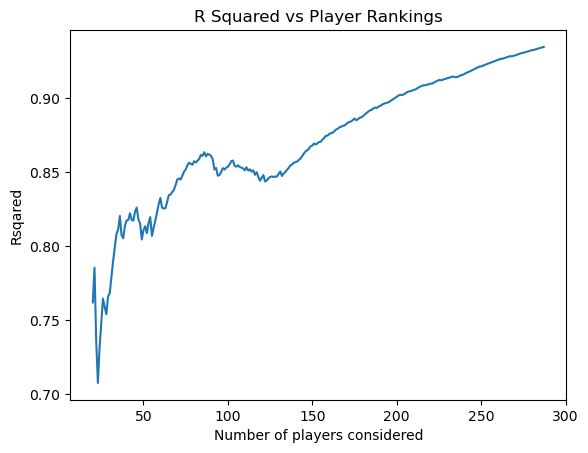

In [106]:
plt.plot(correlation['Row'], correlation['Rsq'], linestyle='-')

# Add labels and title
plt.xlabel('Number of players considered')
plt.ylabel('Rsqared')
plt.title('R Squared vs Player Rankings')

In [108]:
#As we can see, the correlation is weaker for the top 50 players compared to the top 300 players and the correlation gets stronger the further along we go.

In [110]:
#Making it so that ft% and fg% Zscores are adjusted based on your current team

zblk = zblk.rename(columns={'b/g': 'Zblk'})
newperg2023 = pd.concat([newperg2023, zblk['Zblk']], axis=1)

ztrb = ztrb.rename(columns={'r/g': 'Ztrb'})
newperg2023 = pd.concat([newperg2023, ztrb['Ztrb']], axis=1)

zstl = zstl.rename(columns={'s/g': 'Zstl'})
newperg2023 = pd.concat([newperg2023, zstl['Zstl']], axis=1)

zast = zast.rename(columns={'a/g': 'Zast'})
newperg2023 = pd.concat([newperg2023, zast['Zast']], axis=1)

ztov = ztov.rename(columns={'to/g': 'ZTov'})
newperg2023 = pd.concat([newperg2023, ztov['ZTov']], axis=1)

zpts = zpts.rename(columns={'p/g': 'Zpts'})
newperg2023 = pd.concat([newperg2023, zpts['Zpts']], axis=1)

zthrees = zthrees.rename(columns={'3/g': 'Zthrees'})
newperg2023 = pd.concat([newperg2023, zthrees['Zthrees']], axis=1)

In [111]:
zfgV = zfgV.rename(columns={'fgV': 'ZfgV'})
newperg2023 = pd.concat([newperg2023, zfgV['ZfgV']], axis=1)

zftV = zftV.rename(columns={'ftV': 'ZftV'})
newperg2023 = pd.concat([newperg2023, zftV['ZftV']], axis=1)

newperg2023

,Round,Rank,Value,Name,Team,Pos,Inj,g,m/g,p/g,...,Zscore,Zblk,Ztrb,Zstl,Zast,ZTov,Zpts,Zthrees,ZfgV,ZftV
0,1.0,1.0,0.846672,Nikola Jokic,DEN,C,NaN,69.0,33.667633,24.492754,...,15.936961,0.362215,3.045601,1.318376,3.343031,2.502753,1.699489,-0.617874,3.612189,0.671181
1,1.0,2.0,0.830444,Joel Embiid,PHI,PF/C,NaN,66.0,34.608333,33.075758,...,15.531195,2.687347,2.305095,0.533113,0.586197,2.313076,2.999868,-0.430129,2.115139,2.421489
4,1.0,5.0,0.683828,Kevin Durant,PHO,SF/PF,NaN,47.0,35.568440,29.063830,...,14.094374,2.066042,0.774187,-0.299489,0.998410,2.184857,2.392035,0.626439,2.299447,3.052445
2,1.0,3.0,0.754202,Shai Gilgeous-Alexander,OKC,PG/SG,NaN,68.0,35.529902,31.397059,...,13.196850,0.991040,-0.024310,2.480874,1.219888,1.580180,2.745534,-0.588884,0.909537,3.882991
6,1.0,7.0,0.583848,Damian Lillard,POR,PG,NaN,58.0,36.320402,32.172414,...,12.932843,-0.486559,-0.051655,0.117916,2.129204,2.153081,2.863005,3.031832,-0.604353,3.780372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,23.0,268.0,-0.570485,Sam Hauser,BOS,SF/PF,NaN,80.0,16.125000,6.400000,...,-6.364501,-0.596073,-1.027499,-1.385874,-0.999534,-1.407129,-1.041677,0.379523,-0.228453,-0.057786
293,25.0,294.0,-0.613305,Mike Muscala,BOS,C,NaN,63.0,14.998942,6.079365,...,-6.807627,-0.324942,-0.732789,-1.760354,-1.045128,-1.419232,-1.090255,-0.121690,-0.261565,-0.051672
298,25.0,299.0,-0.623331,Yuta Watanabe,BKN,SF/PF,NaN,58.0,15.996839,5.551724,...,-6.901148,-0.526024,-1.079655,-1.179573,-1.028642,-1.401870,-1.170196,-0.392903,0.067487,-0.189771
297,25.0,298.0,-0.621976,Ish Wainright,PHO,PF,Questionable - calf,60.0,15.250833,4.183333,...,-6.960225,-0.357641,-1.129795,-0.570618,-1.001559,-1.417296,-1.377516,-0.484106,-0.727982,0.106288


In [114]:
##Building a function for ft%

#Zscores change based on what your team needs, so we must redo the yeo-johnson transformation when applicable.

def newz_fg(n, fga1, fgp1, fga2, fgp2):
    numerator = n * fga1 * fgp1 + fga2 * fgp2
    denominator = n * fga1 + fga2
    result = numerator / denominator
    fgV = pd.DataFrame([result], columns=['fgV'])
    lam = float(yeojohnson(fgV)[-1])
    return np.ravel(zscore(yeojohnson(fgV, lam))
newz_fg(16,2.7,0.75,7,0.85)   

SyntaxError: '(' was never closed (2022399877.py, line 11)

In [116]:
float(yeojohnson(fgV)[-1])

C:\Users\jgjul\AppData\Local\Temp\ipykernel_3852\3512115825.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  float(yeojohnson(fgV)[-1])


-80.256681415105

In [118]:
lam = float(yeojohnson(fgV)[-1])
np.ravel(zscore(yeojohnson(fgV, lam))

SyntaxError: incomplete input (2281232472.py, line 2)

In [120]:
import numpy as np

# Creating a 2D numpy array
two_dim_array = np.array([[1, 2, 3], [4, 5, 6]])

# Convert the 2D array to a 1D array (vector)
one_dim_vector = two_dim_array.ravel()

# Now, 'one_dim_vector' is a 1D numpy array (vector)
print(one_dim_vector)

two_dim_array

[1 2 3 4 5 6]


array([[1, 2, 3],
       [4, 5, 6]])